In [81]:
#load the data
import pandas as pd
nba = pd.read_csv("nba_2013.csv")

In [82]:
print nba.head()

          player pos  age bref_team_id   g  gs    mp   fg   fga    fg.  \
0     Quincy Acy  SF   23          TOT  63   0   847   66   141  0.468   
1   Steven Adams   C   20          OKC  81  20  1197   93   185  0.503   
2    Jeff Adrien  PF   27          TOT  53  12   961  143   275  0.520   
3  Arron Afflalo  SG   28          ORL  73  73  2552  464  1011  0.459   
4  Alexis Ajinca   C   25          NOP  56  30   951  136   249  0.546   

      ...      drb  trb  ast  stl  blk  tov   pf   pts     season  season_end  
0     ...      144  216   28   23   26   30  122   171  2013-2014        2013  
1     ...      190  332   43   40   57   71  203   265  2013-2014        2013  
2     ...      204  306   38   24   36   39  108   362  2013-2014        2013  
3     ...      230  262  248   35    3  146  136  1330  2013-2014        2013  
4     ...      183  277   40   23   46   63  187   328  2013-2014        2013  

[5 rows x 31 columns]


In [83]:
#lets focus our analysis on point guards. create a new dataframe with only point guards.
point_guards = nba[nba["pos"]=="PG"]

In [84]:
print point_guards.head()

             player pos  age bref_team_id   g  gs    mp   fg  fga    fg.  \
24    D.J. Augustin  PG   26          TOT  71   9  1939  298  718  0.415   
29  Leandro Barbosa  PG   31          PHO  20   0   368   56  131  0.427   
30       Jose Barea  PG   29          MIN  79   1  1471  254  656  0.387   
38   Jerryd Bayless  PG   25          TOT  72  19  1686  248  617  0.402   
50      Steve Blake  PG   33          TOT  55  28  1498  133  353  0.377   

       ...      drb  trb  ast  stl  blk  tov   pf  pts     season  season_end  
24     ...      115  130  313   53    3  125  147  930  2013-2014        2013  
29     ...       32   37   32    7    4   19   30  150  2013-2014        2013  
30     ...      138  154  303   26    0  125  129  660  2013-2014        2013  
38     ...      123  145  194   60    9   82  161  666  2013-2014        2013  
50     ...      146  159  307   54    8  102   85  378  2013-2014        2013  

[5 rows x 31 columns]


In [85]:
#we can choose multiple features to cluster on but keep in mind that when it comes to visualizing clusters on a chart we can only visualize at most 3 features (using 3-dimensional chart).  If more than 3 features are used in the analysis then principal compenent analysis will be need to be done in order to reduce the dimensions so that the clusters can be visaluzed on a chart. 
#in this case let's choose the following 2 features for our analysis: (1) assist turnover ratio = # of assists / # of turnover, and (2) points per game = # of points / # of games

#first because we cannot divide by 0, include only those rows where g != 0 and tov != 0
print "# of records before removing rows with g=0 and/or tov = 0: ", len(point_guards)
point_guards=point_guards[point_guards["g"] != 0]
point_guards=point_guards[point_guards["tov"] != 0]
print "# of records after removing rows with g=0 and/or tov = 0: ", len(point_guards)

point_guards["ppg"]=point_guards["pts"]/point_guards["g"]
point_guards["atr"]=point_guards["ast"]/point_guards["tov"]

# of records before removing rows with g=0 and/or tov = 0:  85
# of records after removing rows with g=0 and/or tov = 0:  82


In [86]:
print point_guards.head()

             player pos  age bref_team_id   g  gs    mp   fg  fga    fg.  \
24    D.J. Augustin  PG   26          TOT  71   9  1939  298  718  0.415   
29  Leandro Barbosa  PG   31          PHO  20   0   368   56  131  0.427   
30       Jose Barea  PG   29          MIN  79   1  1471  254  656  0.387   
38   Jerryd Bayless  PG   25          TOT  72  19  1686  248  617  0.402   
50      Steve Blake  PG   33          TOT  55  28  1498  133  353  0.377   

      ...     ast  stl  blk  tov   pf  pts     season  season_end        ppg  \
24    ...     313   53    3  125  147  930  2013-2014        2013  13.098592   
29    ...      32    7    4   19   30  150  2013-2014        2013   7.500000   
30    ...     303   26    0  125  129  660  2013-2014        2013   8.354430   
38    ...     194   60    9   82  161  666  2013-2014        2013   9.250000   
50    ...     307   54    8  102   85  378  2013-2014        2013   6.872727   

         atr  
24  2.504000  
29  1.684211  
30  2.424000  
38

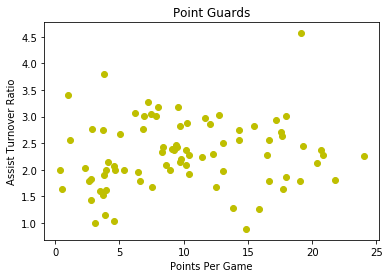

In [87]:
#lets plot the features to see how many clusters we can identify by looking at the plot
import matplotlib.pyplot as plt
plt.scatter(x=point_guards["ppg"],y=point_guards["atr"],c='y')
plt.title("Point Guards")
plt.xlabel("Points Per Game")
plt.ylabel("Assist Turnover Ratio")
plt.show()

In [88]:
#from looking at the plot, it looks like there are 5 clusters
#next, let's choose 5 different random points on the plot, which will represent the 5 centroids of the 5 clusters

#https://stackoverflow.com/questions/22842289/generate-n-unique-random-numbers-within-a-range
def initial_centroids(df):
    import random
    initial_centroid_index = random.sample(range(0,len(point_guards)),5)
    return df.iloc[initial_centroid_index]

centroids_df = initial_centroids(point_guards)
print centroids_df

               player pos  age bref_team_id   g  gs    mp   fg  fga    fg.  \
220      Jarrett Jack  PG   30          CLE  80  31  2252  286  698  0.410   
262         Ty Lawson  PG   26          DEN  62  61  2222  347  806  0.431   
337    Victor Oladipo  PG   21          ORL  80  44  2487  392  936  0.419   
462    Deron Williams  PG   29          BRK  64  58  2059  322  716  0.450   
283  Kendall Marshall  PG   22          LAL  54  45  1564  170  419  0.406   

       ...     ast  stl  blk  tov   pf   pts     season  season_end  \
220    ...     324   56   22  133  133   760  2013-2014        2013   
262    ...     543  100   10  200  113  1090  2013-2014        2013   
337    ...     327  129   37  256  210  1106  2013-2014        2013   
462    ...     392   93   13  143  148   915  2013-2014        2013   
283    ...     477   48    4  150   76   430  2013-2014        2013   

           ppg       atr  
220   9.500000  2.436090  
262  17.580645  2.715000  
337  13.825000  1.27734

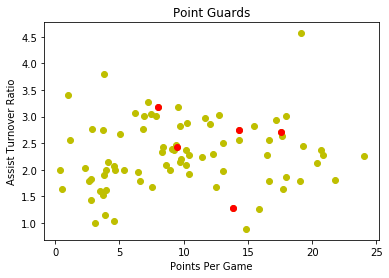

220     9.500000
262    17.580645
337    13.825000
462    14.296875
283     7.962963
Name: ppg, dtype: float64 220    2.436090
262    2.715000
337    1.277344
462    2.741259
283    3.180000
Name: atr, dtype: float64


In [89]:
#lets plot the centroids as well
plt.scatter(x=point_guards["ppg"],y=point_guards["atr"],c='y')
plt.scatter(x=centroids_df['ppg'],y=centroids_df['atr'], c='r')
plt.title("Point Guards")
plt.xlabel("Points Per Game")
plt.ylabel("Assist Turnover Ratio")
plt.show()
print centroids_df['ppg'],centroids_df['atr']

In [90]:
#In K-means clustering, the centroid coordinates are recalculated each time until the clusters are no longer moving.  so create a dictionary to track the centroid's coordinates.
def create_centroid_dict(centroids_df):
    centroids_coordinates = {}
    for i in range(0,len(centroids_df)):
        centroids_coordinates[i] = [centroids_df["ppg"].iloc[i],centroids_df["atr"].iloc[i]]
    return centroids_coordinates
        
centroids_coordinates = create_centroid_dict(centroids_df)
print centroids_coordinates

{0: [9.5, 2.4360902255639099], 1: [17.580645161290324, 2.7149999999999999], 2: [13.824999999999999, 1.27734375], 3: [14.296875, 2.7412587412587412], 4: [7.9629629629629628, 3.1800000000000002]}


In [91]:
#First step in K-means clustering is to calculate euclidean distance between the records and the centroids.  this step will be repeated so let's create a function so that it can called upon again and again.
def calculate_distance(centroid_coordinate,record_coordinate):
    squared_distance=0
    for i in range(0,len(centroid_coordinate)):
        squared_distance += (centroid_coordinate[i]-record_coordinate[i])**2
    return squared_distance**(0.5)

In [92]:
#the row/record will be assigned to the cluster that it is closest to (i.e. lowest distance).  so, let's create a column called cluster that will contain the cluster number the record belongs.   this step will be repeated so let's create a function so that it can called upon again and again.
def assign_cluster(row):
    lowest_distance = -1 #initialize distance = -1 so that each time a new row/record is loaded into this assign_cluster function, the distance will be reset
    for cluster_id, centroid_coordinate in centroids_coordinates.items():
        if lowest_distance == -1: #this will execute only once per row because the lowest_distance will change from -1 in the next line
            lowest_distance = calculate_distance(centroid_coordinate,[row["ppg"],row["atr"]])
            closest_cluster = cluster_id
        elif calculate_distance(centroid_coordinate,[row["ppg"],row["atr"]]) < lowest_distance:
            lowest_distance = calculate_distance(centroid_coordinate,[row["ppg"],row["atr"]])
            closest_cluster = cluster_id
    return closest_cluster

def assign_clusters(df):
    df["cluster"]=df.apply(lambda row: assign_cluster(row),axis='columns') #explanation of axis https://www.youtube.com/watch?v=PtO3t6ynH-8.

assign_clusters(point_guards)
print point_guards

                      player pos  age bref_team_id   g  gs    mp   fg   fga  \
24             D.J. Augustin  PG   26          TOT  71   9  1939  298   718   
29           Leandro Barbosa  PG   31          PHO  20   0   368   56   131   
30                Jose Barea  PG   29          MIN  79   1  1471  254   656   
38            Jerryd Bayless  PG   25          TOT  72  19  1686  248   617   
50               Steve Blake  PG   33          TOT  55  28  1498  133   353   
52              Eric Bledsoe  PG   24          PHO  43  40  1416  265   556   
60             Avery Bradley  PG   23          BOS  60  58  1855  361   825   
64              Aaron Brooks  PG   29          TOT  72  12  1557  233   581   
71                Trey Burke  PG   21          UTA  70  68  2262  341   897   
76             Dwight Buycks  PG   24          TOR  14   0   146   15    48   
78                Will Bynum  PG   31          DET  56   3  1054  184   430   
82             Isaiah Canaan  PG   22          HOU  

In [93]:

d = {'col1': [1,2, 3], 'col2': [1,2, 4]}
df = pd.DataFrame(data=d)
#print df
#print "axis=1 or axis=columns"
#print df.mean(axis=1)
#print "axis=0 or axis=rows"
#print df.mean(axis=0)
#print df.apply(lambda x: x**2,axis=1)
#print (df["col1"]/df[df["col2"]!=0])
(df["col1"]==df["col2"]).all()

False

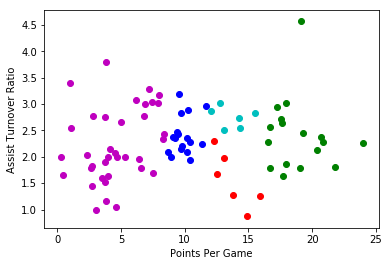

In [94]:
#visualize the clusters
def visualize_clusters(df):
    colours = ['b', 'g', 'r', 'c', 'm']
    for cluster_id in range(0,df['cluster'].max()+1):
        clustered_df = df[df["cluster"]==cluster_id]
        plt.scatter(x=clustered_df["ppg"],y=clustered_df["atr"],c=colours[cluster_id])
    plt.xlabel("Points Per Game")
    plt.ylabel("Assist Turnover Ratio")
    plt.show()
    
visualize_clusters(point_guards)

In [95]:
#recalculate centroids
def recalculate_centroids(df):
    for cluster_id in range(0,df['cluster'].max()+1):
        clustered_df = df[df["cluster"]==cluster_id]
        centroids_coordinates[cluster_id] = [clustered_df["ppg"].mean(),clustered_df["atr"].mean()]
    return centroids_coordinates

centroids_coordinates = recalculate_centroids(point_guards)
print centroids_coordinates

{0: [9.890626971316275, 2.404918262724038], 1: [18.881281980075716, 2.418442738660092], 2: [13.74981934781379, 1.5609093728349244], 3: [13.679338962697756, 2.7534280793419046], 4: [4.598011098439251, 2.231405350231432]}


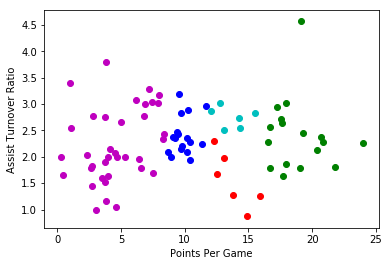

In [96]:
#visualize the new clusters
visualize_clusters(point_guards)

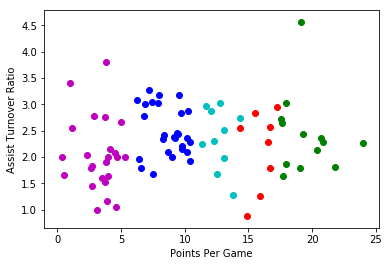

In [102]:
#keep recalculating the centroids and assigning clusters until the clusters no longer change (i.e. the points on the graph stay the same colour)
recalculate_centroids(point_guards)
assign_clusters(point_guards)
visualize_clusters(point_guards)